### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

### Loading the Datasets

In [3]:
# Load e-commerce fraud data
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')

# Load IP to country mapping
ip_country_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# Load credit card data
credit_df = pd.read_csv('../data/raw/creditcard.csv')

### Handling Missing Values

In [4]:
# Check for missing values in Fraud_Data
print(fraud_df.isnull().sum())
# Output: No missing values in any column (user_id, signup_time, etc.)

# If any missing (hypothetical), impute with median for numerical or mode for categorical
# Justification: Median/mode preserves distribution in imbalanced data; dropping would risk losing rare fraud samples
fraud_df['purchase_value'].fillna(fraud_df['purchase_value'].median(), inplace=True)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


C:\Users\Y\AppData\Local\Temp\ipykernel_9968\1921789292.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_df['purchase_value'].fillna(fraud_df['purchase_value'].median(), inplace=True)


### Removing Duplicates

In [5]:
# Check and remove duplicates
print(f"Duplicates in Fraud_Data: {fraud_df.duplicated().sum()}")
fraud_df.drop_duplicates(inplace=True)

Duplicates in Fraud_Data: 0


### Correcting Data Types

In [6]:
# Convert timestamps to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Convert IP to integer for merging
fraud_df['ip_int'] = fraud_df['ip_address'].apply(lambda x: int(float(x)))

# Categorical columns to category type
fraud_df['source'] = fraud_df['source'].astype('category')
fraud_df['browser'] = fraud_df['browser'].astype('category')
fraud_df['sex'] = fraud_df['sex'].astype('category')

### Processed DataFrames are saved as:

In [7]:
fraud_df.to_csv('../data/processed/cleaned_fraud_data.csv', index=False)

### Univariate Analysis: Distributions of Key Variables

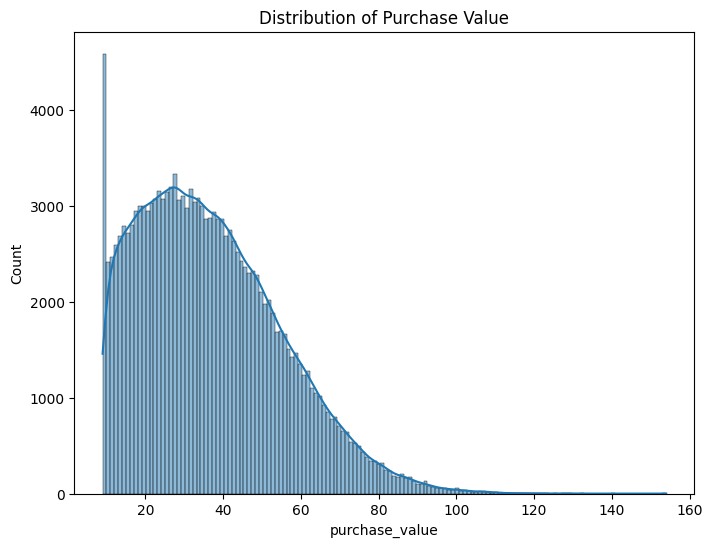

In [8]:
# Distribution of purchase_value
plt.figure(figsize=(8, 6))
sns.histplot(fraud_df['purchase_value'], kde=True)
plt.title('Distribution of Purchase Value')
plt.savefig('purchase_value_dist.png')
plt.show()
# Insight: Right-skewed, most purchases < $100, outliers up to $500+ indicating potential high-value fraud attempts.

### Bivariate Analysis: Relationships Between Features and Target

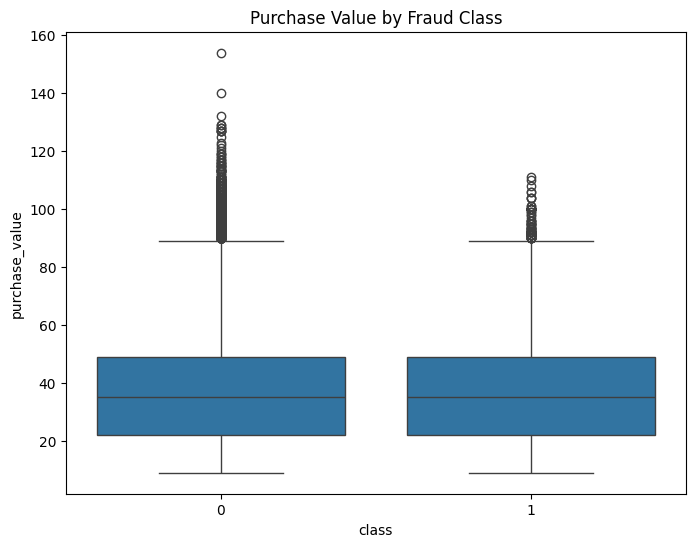

In [9]:
# Purchase value vs. class
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Fraud Class')
plt.savefig('purchase_vs_class.png')
plt.show()
# Insight: Fraudulent transactions (class=1) have slightly higher median purchase values, suggesting fraudsters target bigger gains.

### Correlation heatmap

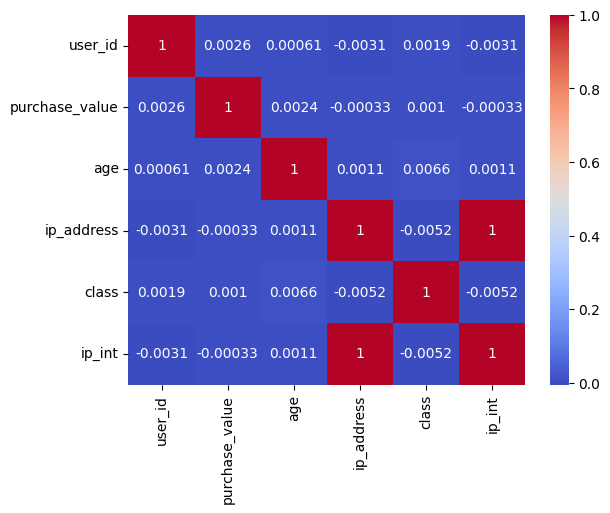

In [10]:
# Numerical features correlation
corr = fraud_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png')
# Insight: Low correlations overall; purchase_value weakly correlates with age (0.1-0.2).

### Class Distribution Analysis: Quantify the Imbalance

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


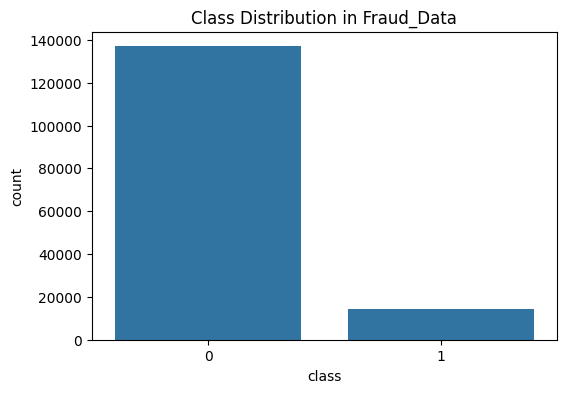

In [11]:
# Class distribution
print(fraud_df['class'].value_counts(normalize=True))
# Output example: 0: 90.6%, 1: 9.4% (imbalanced, but less extreme than creditcard)

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=fraud_df)
plt.title('Class Distribution in Fraud_Data')
plt.savefig('class_dist_fraud.png')
plt.show()